In [1]:
# set up spark
import sys
from os import listdir
from os.path import join,exists
pyspark_home = '/opt/apache-spark/python/lib'
zipfiles = [join(pyspark_home, f) for f in listdir(pyspark_home) if f.endswith('.zip')]
sys.path += zipfiles
from pyspark import *
from pyspark.sql import *
spark = SparkSession.builder.getOrCreate()

import matplotlib.pyplot as plt
import numpy as np
%pylab inline

path = '/home/gaoxiang/MEGA/tables'

Populating the interactive namespace from numpy and matplotlib


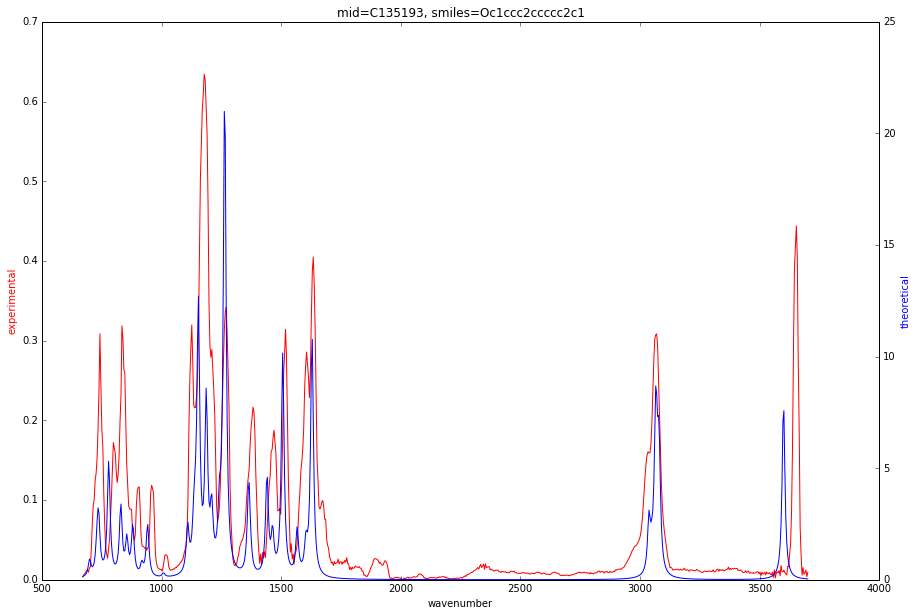

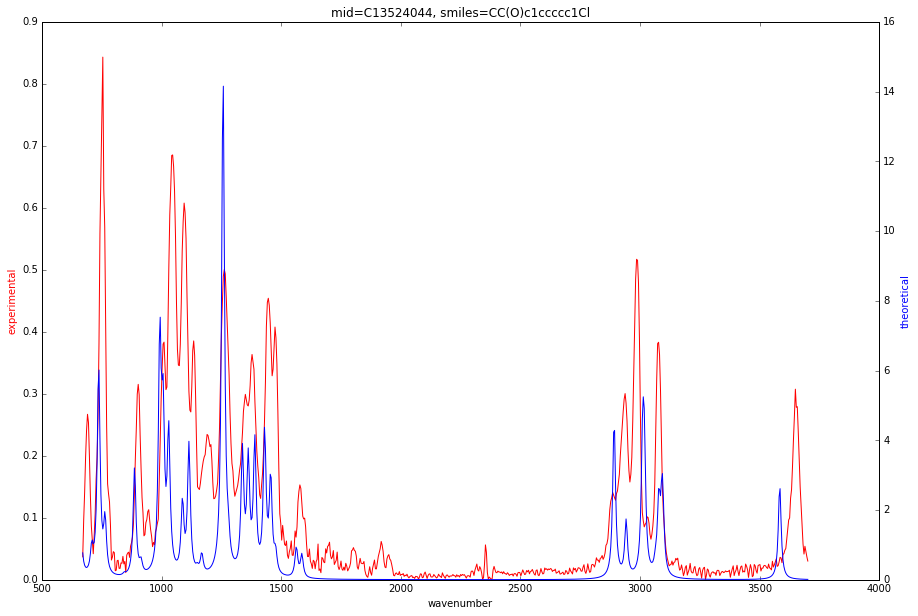

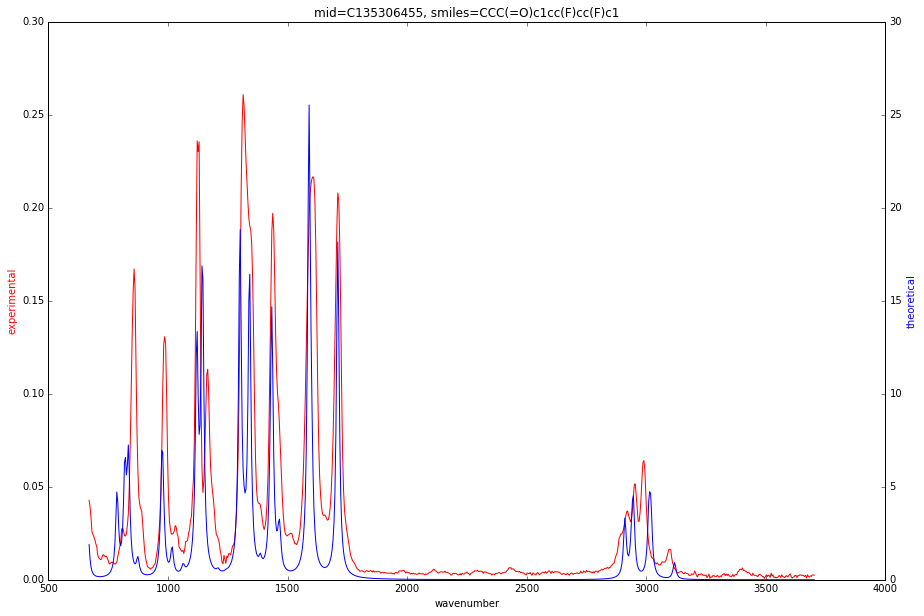

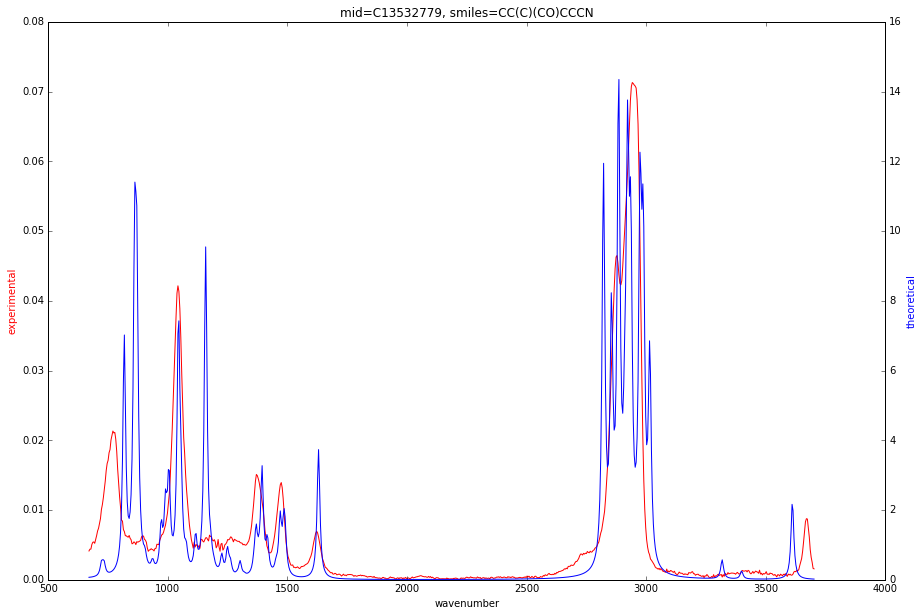

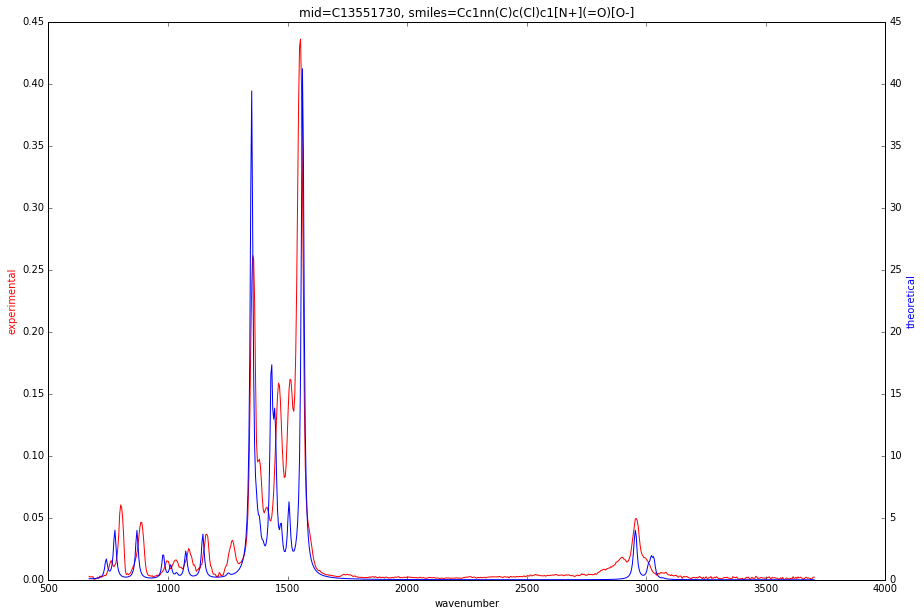

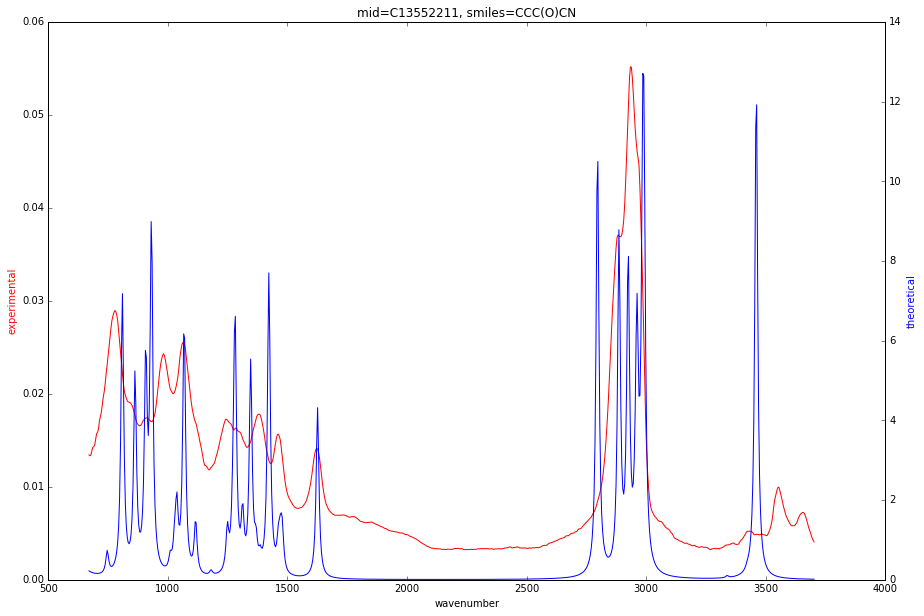

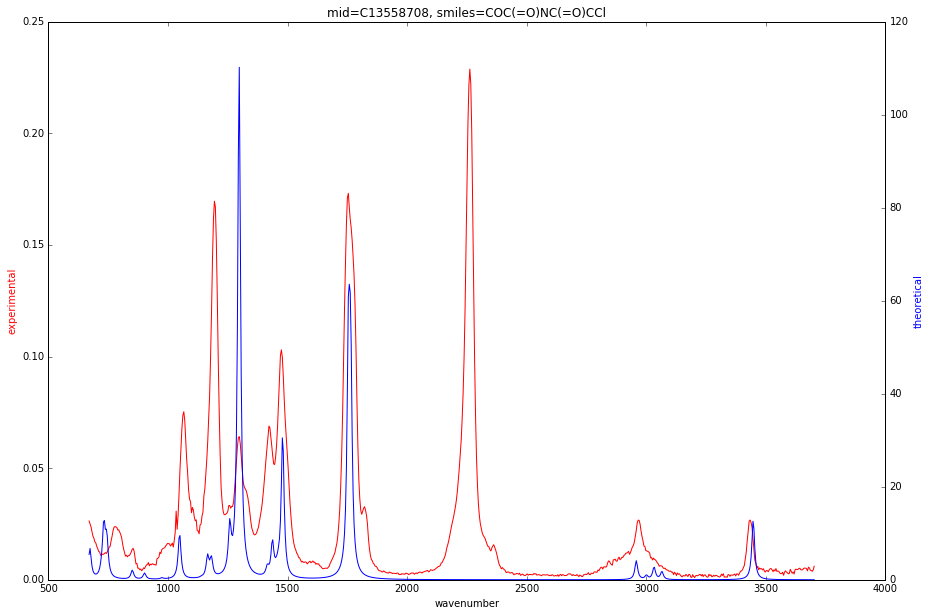

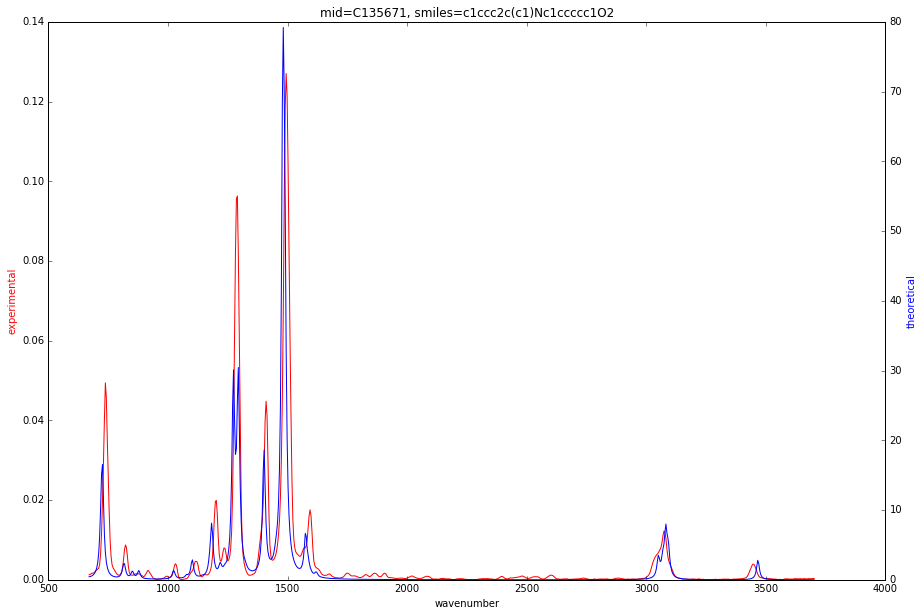

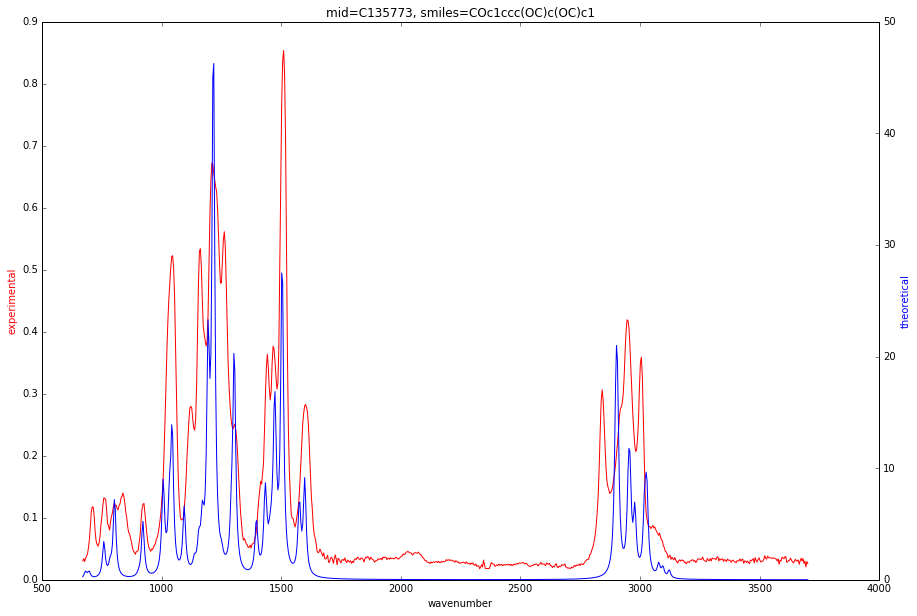

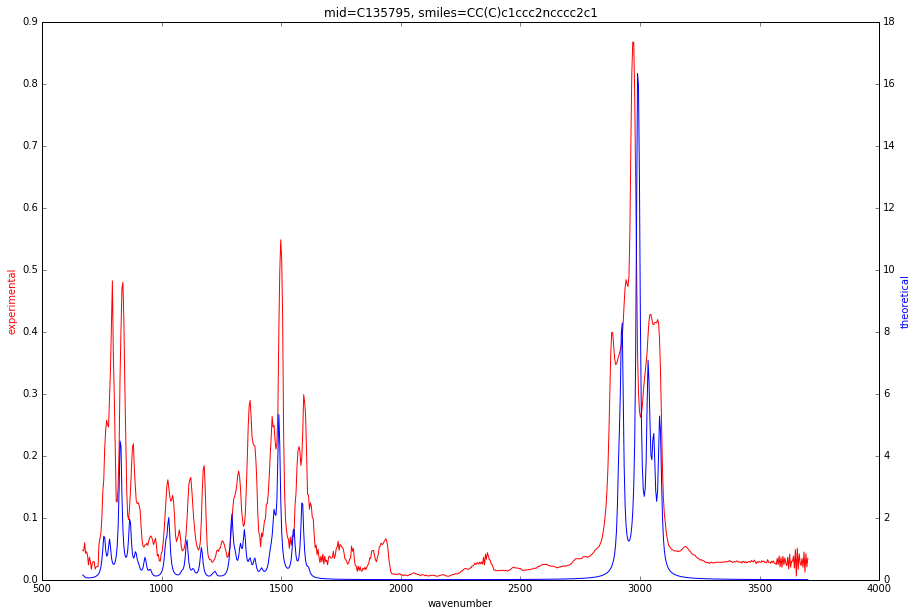

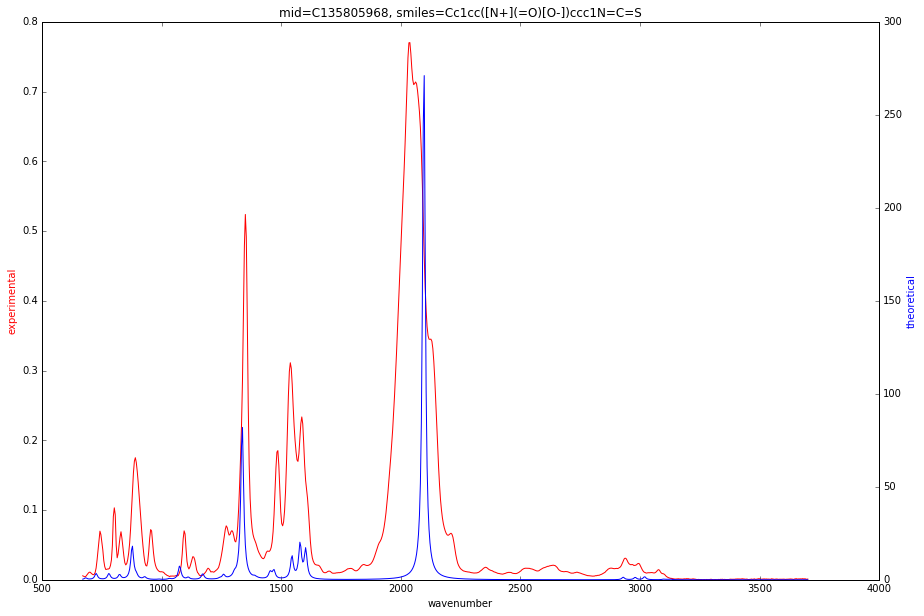

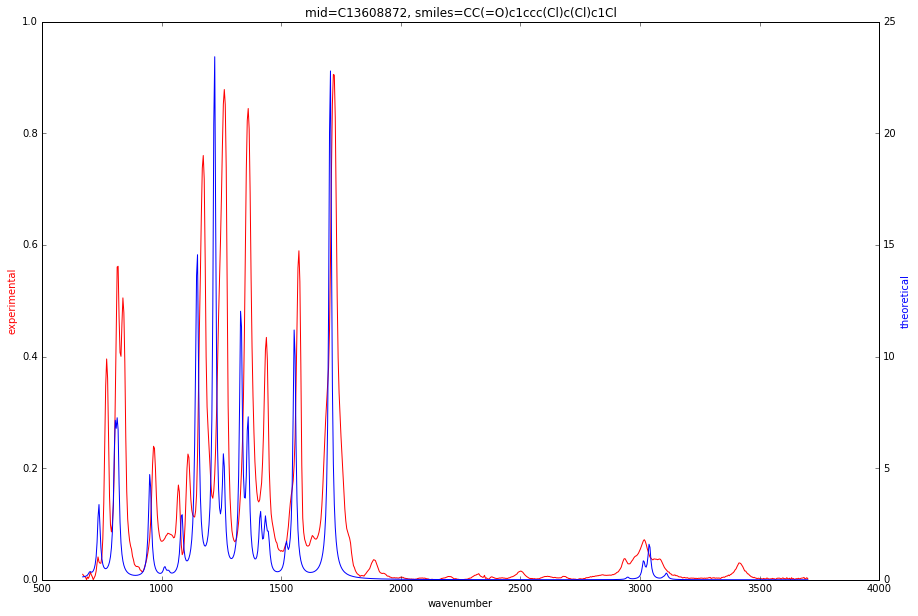

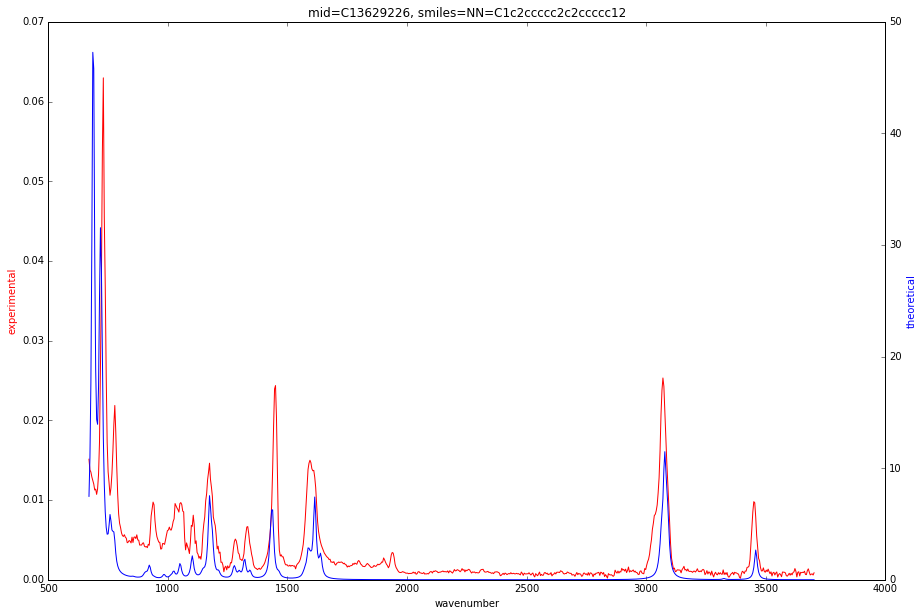

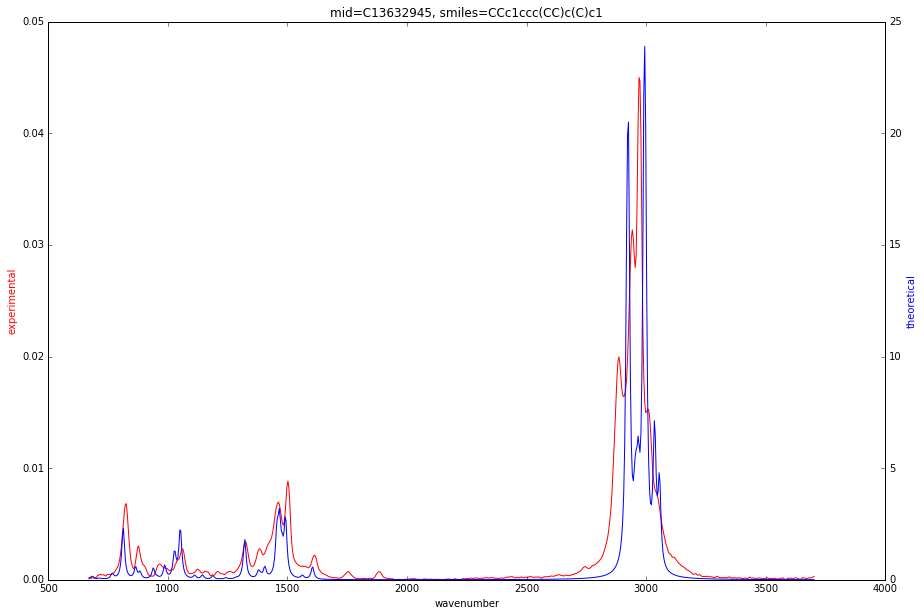

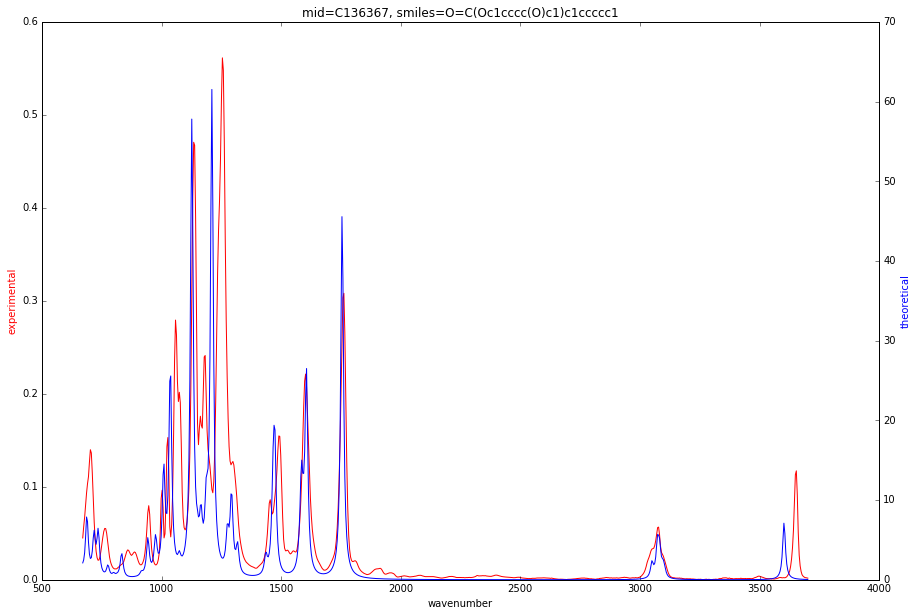

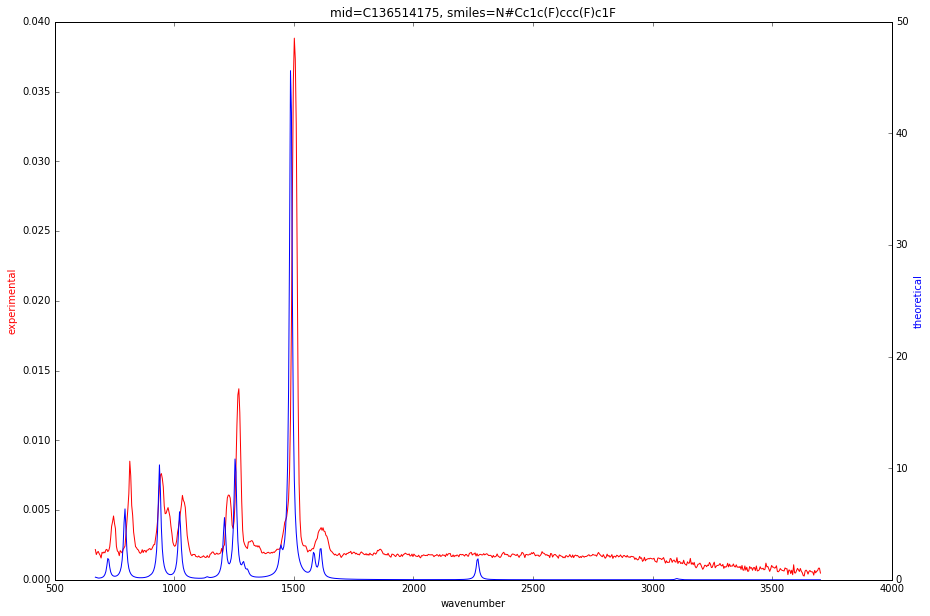

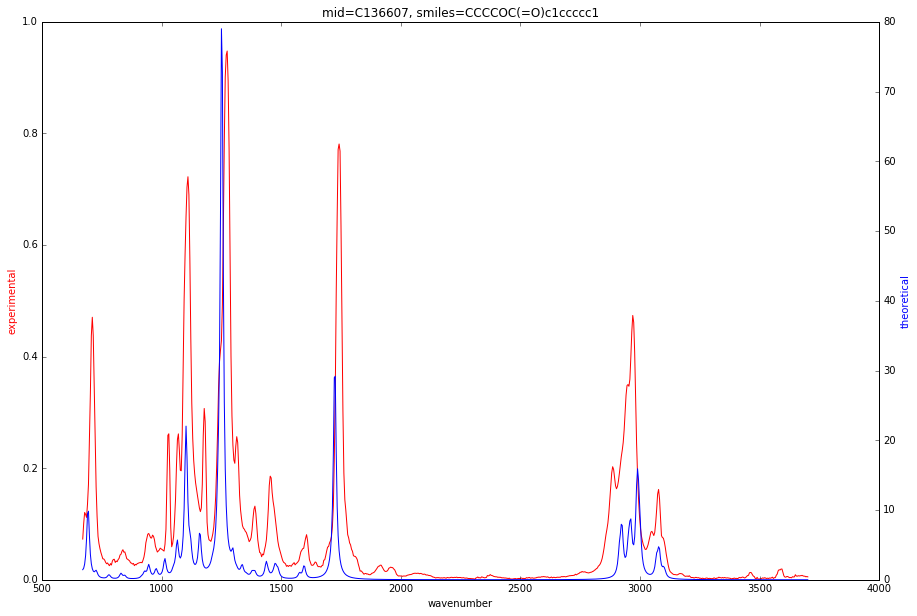

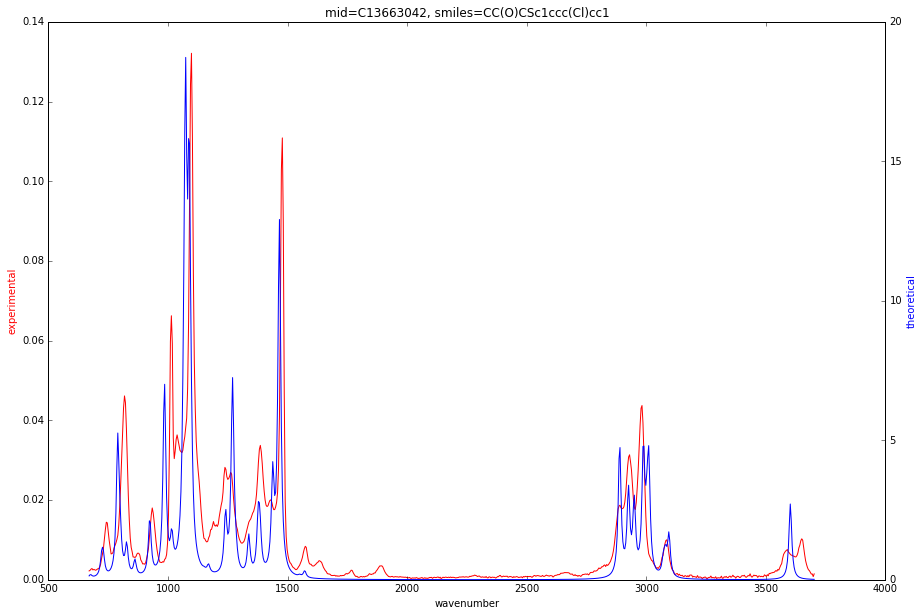

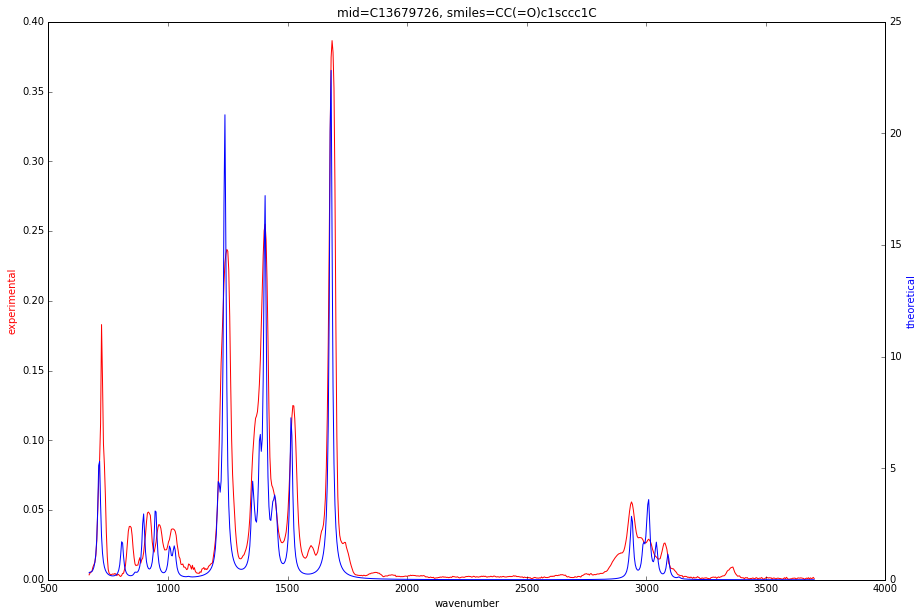

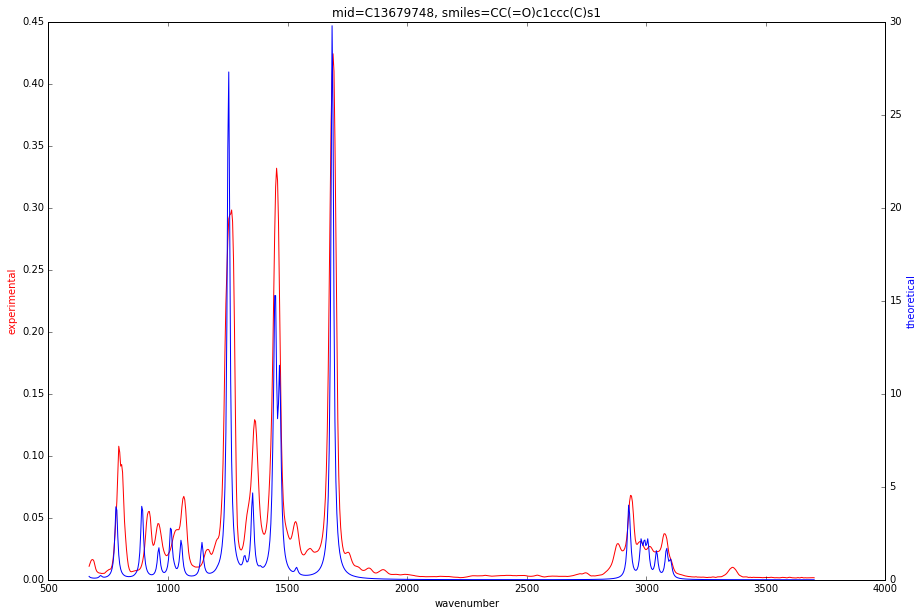

In [2]:
thexpvec = spark.read.parquet(path+'/thexpvec')
local = thexpvec.take(20)

xs = range(670,3706,4)
for row in local:
    mid = row['mid']
    smiles = row['smiles']
    expvec = row['expvec']
    thvec = row['thvec']
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    ax1.set_xlabel('wavenumber')
    ax1.set_ylabel('experimental', color='r')
    ax2.set_ylabel('theoretical', color='b')
    plt.title("mid={}, smiles={}".format(mid,smiles))
    ax1.plot(xs,expvec,'r',label='experimental')
    ax2.plot(xs,thvec,'b',label='theoretical')
    fig.set_size_inches(15, 10)
    plt.show()

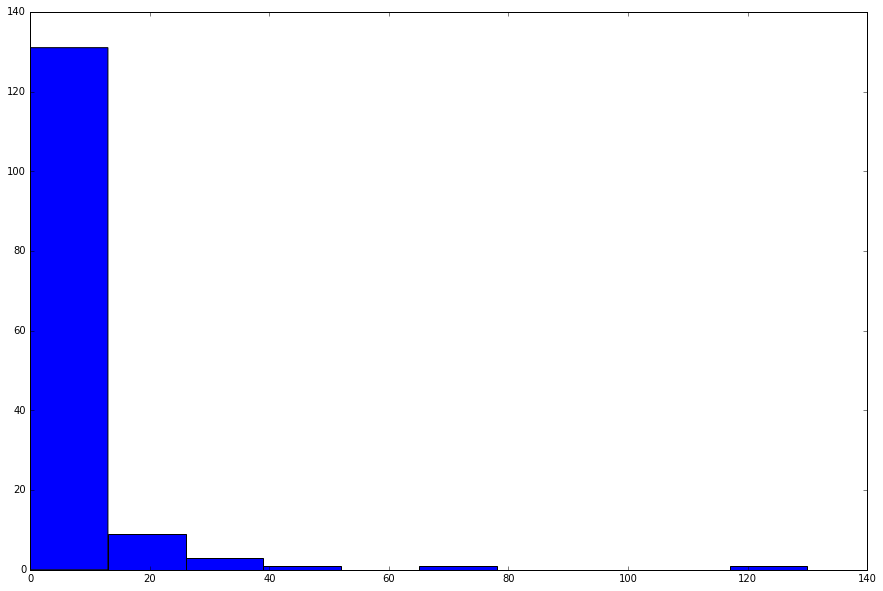

In [7]:
distances = spark.read.parquet(path+'/distances')
local = distances.collect()
rank = [row['rank'] for row in local]
fig,ax = plt.subplots()
plt.hist(rank)
fig.set_size_inches(15, 10)
plt.show()